# create a fusion of differnet notification sounds

process:

1. import all sounds from the directory
2. encode them
3. average the encodings
4. export .npy and .wav file

In [2]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from magenta.models.nsynth import utils
from magenta.models.nsynth.wavenet import fastgen
%matplotlib inline
%config InlineBackend.figure_format = 'jpg'

/home/bird/miniconda3/envs/nsynth/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/bird/miniconda3/envs/nsynth/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


### load all audio files and encode them

loaded in/notifications/notficationwav_13.wav. samples: 80000. expected samples: 80000
loaded in/notifications/notficationwav_7.wav. samples: 80000. expected samples: 80000
loaded in/notifications/notficationwav_12.wav. samples: 80000. expected samples: 80000
loaded in/notifications/notficationwav_17.wav. samples: 80000. expected samples: 80000
loaded in/notifications/notficationwav_28.wav. samples: 80000. expected samples: 80000
loaded in/notifications/notficationwav_37.wav. samples: 80000. expected samples: 80000


2022-06-16 17:14:23.735171: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:23.735572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:23.735885: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:23.736253: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:23.736618: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

INFO:tensorflow:Restoring parameters from models/wavenet-ckpt/model.ckpt-200000


2022-06-16 17:14:26.400956: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:26.401460: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:26.401748: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:26.402065: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:26.402361: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

INFO:tensorflow:Restoring parameters from models/wavenet-ckpt/model.ckpt-200000


2022-06-16 17:14:28.853751: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:28.854117: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:28.854429: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:28.854805: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:28.855124: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

INFO:tensorflow:Restoring parameters from models/wavenet-ckpt/model.ckpt-200000


2022-06-16 17:14:31.525990: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:31.526333: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:31.526618: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:31.526955: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:31.527241: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

INFO:tensorflow:Restoring parameters from models/wavenet-ckpt/model.ckpt-200000


2022-06-16 17:14:33.945511: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:33.945884: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:33.946164: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:33.946475: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:33.946779: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

INFO:tensorflow:Restoring parameters from models/wavenet-ckpt/model.ckpt-200000


2022-06-16 17:14:36.513478: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:36.513846: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:36.514126: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:36.514441: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:36.514744: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

INFO:tensorflow:Restoring parameters from models/wavenet-ckpt/model.ckpt-200000


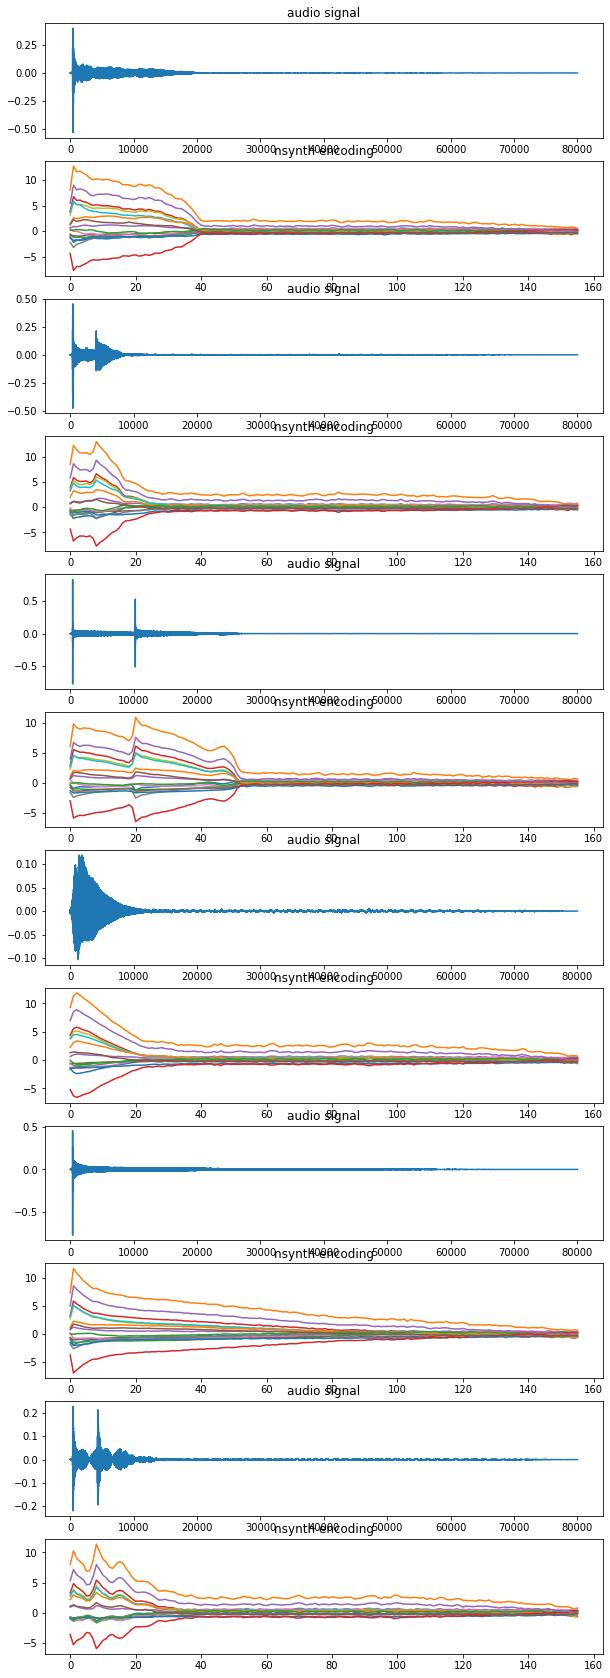

In [8]:
# audio parameters
audio_file_dir = os.path.join('in', 'notifications')
audio_length = 5
sample_rate = 16000
sample_length = sample_rate * audio_length

# load audio files into numpy arrays
audios = []
for path in glob(os.path.join(audio_file_dir, '*.wav')):

    audio = utils.load_audio(path, sample_length=sample_length, sr=sample_rate)
    print(
        f'loaded {path}. samples: {audio.shape[0]}. expected samples: {sample_length}'
    )
    audios.append(audio)

# encode
encodings = [
    fastgen.encode(audio,
                   os.path.join('models', 'wavenet-ckpt', 'model.ckpt-200000'),
                   sample_length) for audio in audios
]

# plot encodings
fig, axs = plt.subplots(len(encodings) * 2,
                        1,
                        figsize=(10, len(encodings) * 2 * 2.5))
for index, (encoding, audio) in enumerate(zip(encodings, audios)):
    axs[index * 2].plot(audio)
    axs[index * 2].set_title('audio signal')
    axs[index * 2 + 1].plot(encoding[0])
    axs[index * 2 + 1].set_title('nsynth encoding')


### average out the econdings

Text(0.5, 1.0, 'Averaged NSynth Encoding')

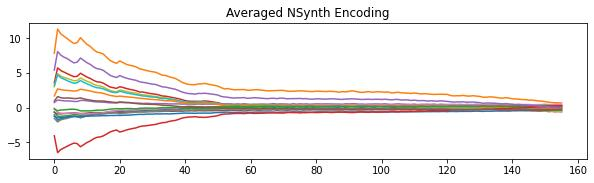

In [9]:
fused_encoding = encodings[0]
for encoding in encodings[1:]:
    fused_encoding += encoding

fused_encoding /= len(encodings)

fig, axs = plt.subplots(1, 1, figsize=(10, 2.5))
axs.plot(fused_encoding[0])
axs.set_title('Averaged NSynth Encoding')

### save numpy array to .npy

In [10]:
np.save(
    os.path.join('npy',
                 'fused.npy'),
    encoding)

### synthesize audio from averaged encoding

In [11]:
fastgen.synthesize(
    encoding,
    save_paths=[os.path.join('out', 'fused.wav')],
    checkpoint_path=os.path.join('models', 'wavenet-ckpt',
                                 'model.ckpt-200000'),
    samples_per_save=sample_length)

2022-06-16 17:14:54.983594: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:54.984222: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:54.984835: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:54.985493: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-16 17:14:54.986212: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

INFO:tensorflow:Restoring parameters from models/wavenet-ckpt/model.ckpt-200000
INFO:tensorflow:Sample: 0
INFO:tensorflow:Saving: out/fused.wav
INFO:tensorflow:Sample: 100
INFO:tensorflow:Sample: 200
INFO:tensorflow:Sample: 300
INFO:tensorflow:Sample: 400
INFO:tensorflow:Sample: 500
INFO:tensorflow:Sample: 600
INFO:tensorflow:Sample: 700
INFO:tensorflow:Sample: 800
INFO:tensorflow:Sample: 900
INFO:tensorflow:Sample: 1000
INFO:tensorflow:Sample: 1100
INFO:tensorflow:Sample: 1200
INFO:tensorflow:Sample: 1300
INFO:tensorflow:Sample: 1400
INFO:tensorflow:Sample: 1500
INFO:tensorflow:Sample: 1600
INFO:tensorflow:Sample: 1700
INFO:tensorflow:Sample: 1800
INFO:tensorflow:Sample: 1900
INFO:tensorflow:Sample: 2000
INFO:tensorflow:Sample: 2100
INFO:tensorflow:Sample: 2200
INFO:tensorflow:Sample: 2300
INFO:tensorflow:Sample: 2400
INFO:tensorflow:Sample: 2500
INFO:tensorflow:Sample: 2600
INFO:tensorflow:Sample: 2700
INFO:tensorflow:Sample: 2800
INFO:tensorflow:Sample: 2900
INFO:tensorflow:Sample: 